In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [3]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
#Merging the datasets for the deeper analysis
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')
print(merged_data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [5]:
#Creating customer features like total spending,no.of transactions
customer_features = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'nunique',
    'Quantity': 'sum'
}).reset_index()

In [6]:
#Standardize the features
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features[['TotalValue', 'TransactionID', 'Quantity']])

In [28]:
#Choosing the number of clusters, here we are choosing 4
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features_scaled)

In [29]:
#Calculating DB Index(Davies-Bouldin Index)
db_index = davies_bouldin_score(customer_features_scaled, customer_features['Cluster'])
silhouette = silhouette_score(customer_features_scaled, customer_features['Cluster'])
inertia = kmeans.inertia_

# Print metrics
print(f"Davies-Bouldin Index (DB Index): {db_index}")
print(f"Silhouette Score: {silhouette}")
print(f"Inertia: {inertia}")

Davies-Bouldin Index (DB Index): 0.8650620583623065
Silhouette Score: 0.3735646055654105
Inertia: 111.98680046410658


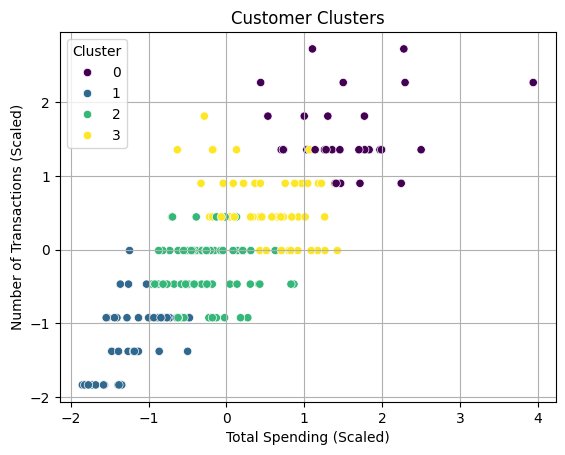

In [33]:
# Scatter plot of clusters
sns.scatterplot(x=customer_features_scaled[:, 0], y=customer_features_scaled[:, 1], hue=customer_features['Cluster'], palette='viridis')
plt.title('Customer Clusters')
plt.xlabel('Total Spending (Scaled)')
plt.ylabel('Number of Transactions (Scaled)')
plt.grid(True)
plt.show()